Import Libraries

In [0]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms


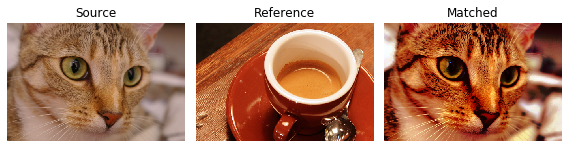

In [6]:
reference = data.coffee()
img = data.chelsea()

matched = match_histograms(img, reference, multichannel= True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (8 , 3),
                                    sharex= True, sharey= True)

for i in (ax1, ax2, ax3):
  i.set_axis_off()

ax1.imshow(img)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title("Reference")
ax3.imshow(matched)
ax3.set_title("Matched")

plt.tight_layout()
plt.show()


To illustrate the effect of the histogram matching, we will plot for each RGB channel, the histogram and the cumulative histogram.

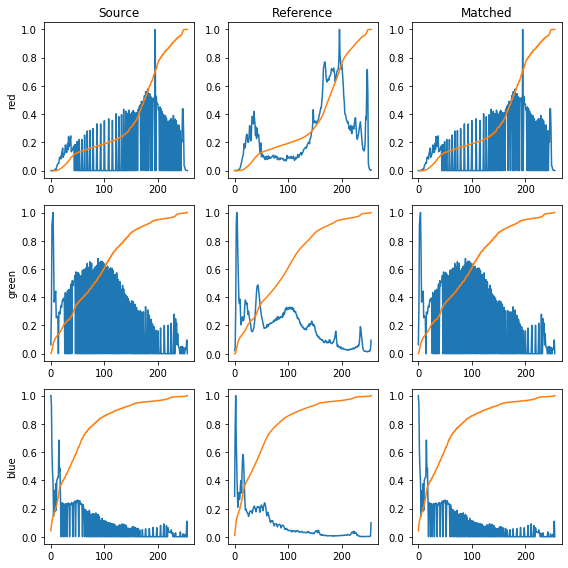

In [11]:
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize = (8, 8))

for i , img in enumerate ((img, reference, matched)):
  for c, c_color in enumerate(('red' , 'green' , 'blue')):
    img_hist, bins = exposure.histogram(img[..., c], source_range= 'dtype')
    axes[c, i].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(img[...,c]) #Return cumulative distribution function (cdf) for the given image.
    axes[c, i].plot(bins, img_cdf)
    axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()